In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
file_path = "winequality-red.csv"
df = pd.read_csv(file_path)

In [5]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1568,7.0,0.560,0.13,1.60,0.077,25.0,42.0,0.99629,3.34,0.59,9.2,5
208,7.8,0.440,0.28,2.70,0.100,18.0,95.0,0.99660,3.22,0.67,9.4,5
818,7.1,0.715,0.00,2.35,0.071,21.0,47.0,0.99632,3.29,0.45,9.4,5
1027,6.4,0.795,0.00,2.20,0.065,28.0,52.0,0.99378,3.49,0.52,11.6,5
1051,8.5,0.460,0.59,1.40,0.414,16.0,45.0,0.99702,3.03,1.34,9.2,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df[["density"]] = np.round(df[["density"]],2)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,1.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,1.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,1.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,1.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,1.0,3.51,0.56,9.4,5


In [11]:
#df.describe()
df.drop_duplicates(inplace=True)


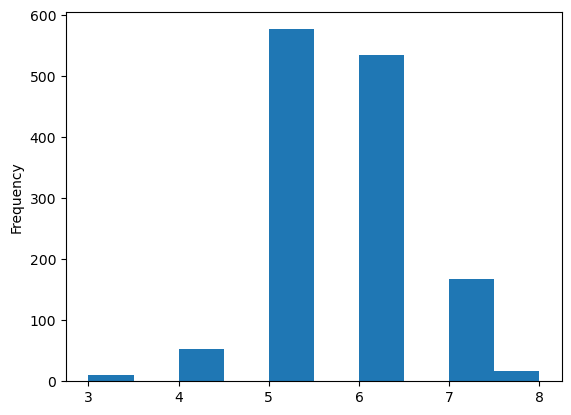

In [13]:
df["quality"].plot(kind='hist')
plt.show()

From the histogram:
Most wines are rated 5 or 6.
Very few have very low (3, 4) or very high (8) scores.

If we assume this as classification, the **imbalance** means:
-The model could be biased toward predicting the majority classes (5 and 6).
-You might need to handle imbalance (e.g., resampling or adjusting class weights).



In [22]:
corr_matrix = df.corr()
target_matrix = corr_matrix["quality"]
quality_corr_matrix = target_matrix.reset_index()
quality_corr_matrix.columns = ['Feature', 'Correlation_with_target']
quality_corr_matrix = quality_corr_matrix.sort_values(by='Correlation_with_target', ascending=True)
print(quality_corr_matrix)

                 Feature  Correlation_with_target
1       volatile acidity                -0.390558
7                density                -0.210726
6   total sulfur dioxide                -0.185100
4              chlorides                -0.128907
8                     pH                -0.057731
5    free sulfur dioxide                -0.050656
3         residual sugar                 0.013732
0          fixed acidity                 0.124052
2            citric acid                 0.226373
9              sulphates                 0.251397
10               alcohol                 0.476166
11               quality                 1.000000


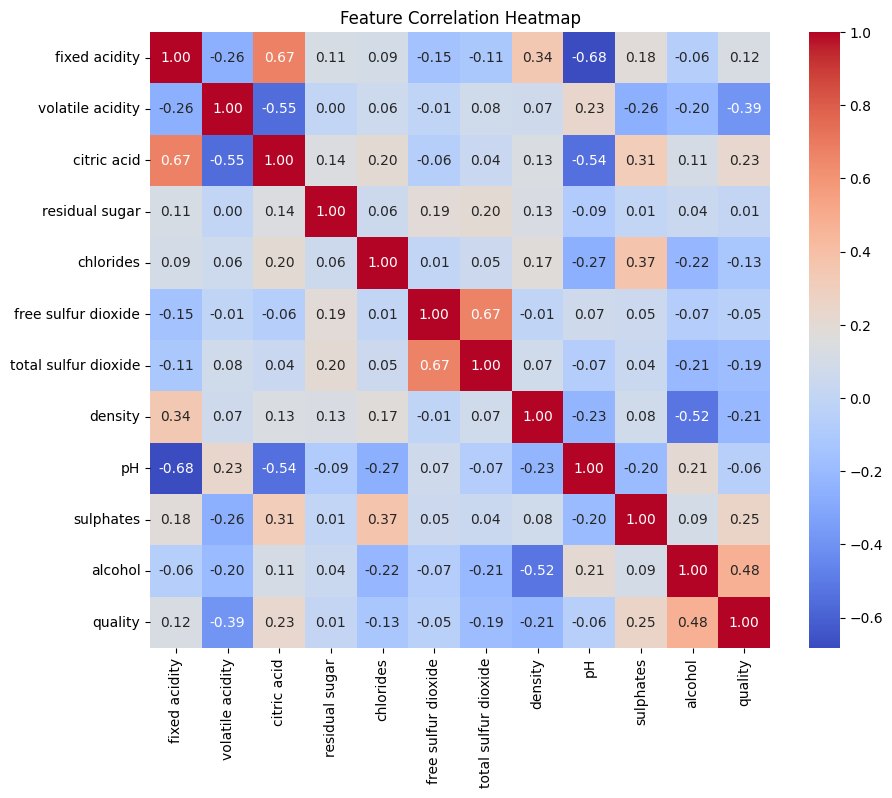

In [23]:
plt.figure(figsize=(10, 8))  # optional: adjust size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

A **correlation heatmap** visually shows how strongly different features in the dataset are related to each other.
We Look for:

*Strong positive pairs:* features that move together, possibly redundant (you might drop one in modeling)

*Strong negative pairs:* features that behave oppositely (may give different insights)

*Weak correlations:* features that don’t linearly relate (maybe useful to keep)

Here, **free sulfur dioxide** & **total sulfur dioxide** have a strong positive correlation,
That means we can remove one of them in modeling as both of them treat equally.
Also, **PH** & **fixed acidity** have strong negative correlation
Also, **fixid acidity** & **citric acid**

Now for linear model development, we go with the following feature:
* alcohol (0.48) 
* volatile acidity (-0.39) 
* sulphates (0.25) 
* citric acid (0.23) 
* density (-0.21) 
* total sulfur dioxide (-0.18) 
* fixed acidity (0.12)
* chlorides

In [ ]:
from sklearn.model_selection import train_test_split

linear_model_subset = df[["alcohol","volatile acidity","sulphates","citric acid","density",
                         "total sulfur dioxide","fixed acidity","chlorides"]]
target = df["quality"]
x_train, x_test, y_train, y_test = train_test_split(linear_model_subset, target, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
#print(y_pred)



Now the **model evaluation**

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
rmse = mean_squared_error(y_test , y_pred , squared=False)
r2 = r2_score(y_test , y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"r2: {r2:.2f}")

MAE: 0.49
MSE: 0.42
RMSE: 0.65
r2: 0.41


C:\Users\nasta\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**MAE, MSE, RMSE:** These will help you understand the average magnitude of errors your model is making. A smaller value indicates better performance.

**R²:** This tells you how much variance in the quality score your model is explaining. A value close to 1 is good, and closer to 0 means poor performance. If R² is low (e.g., <0.5), the model might not be the best fit.

* so it seems that our model is moderately good, but let's check it visually 

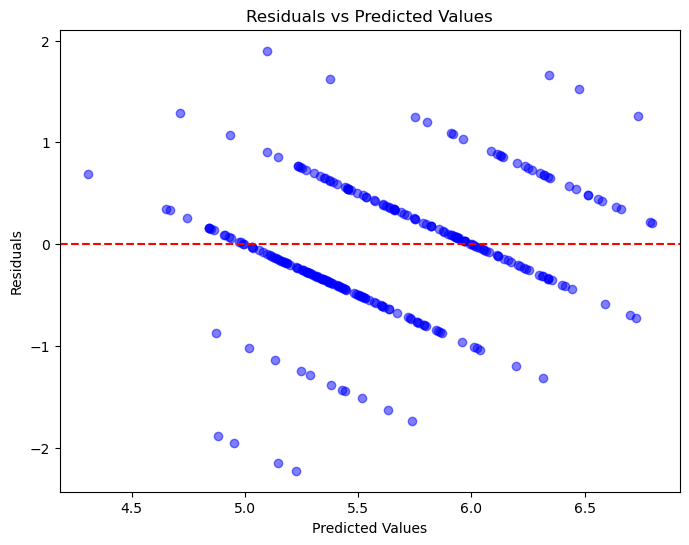

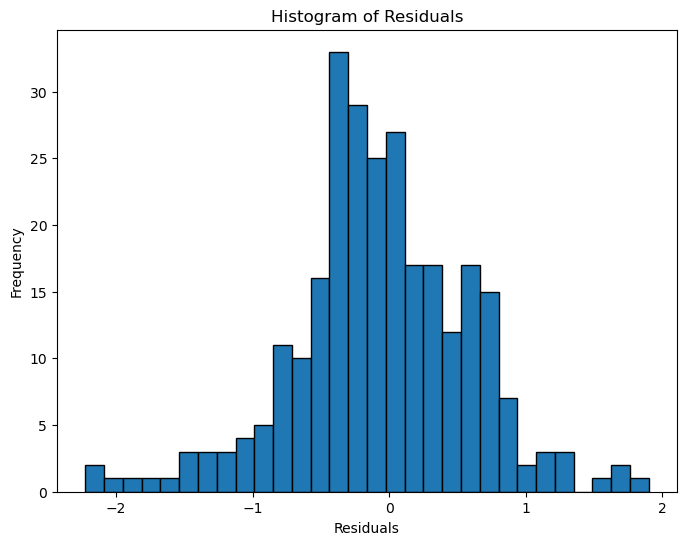

C:\Users\nasta\AppData\Local\Temp\ipykernel_31372\1525132615.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(target, hist = False, color ="r", label="Actual Values")
C:\Users\nasta\AppData\Local\Temp\ipykernel_31372\1525132615.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

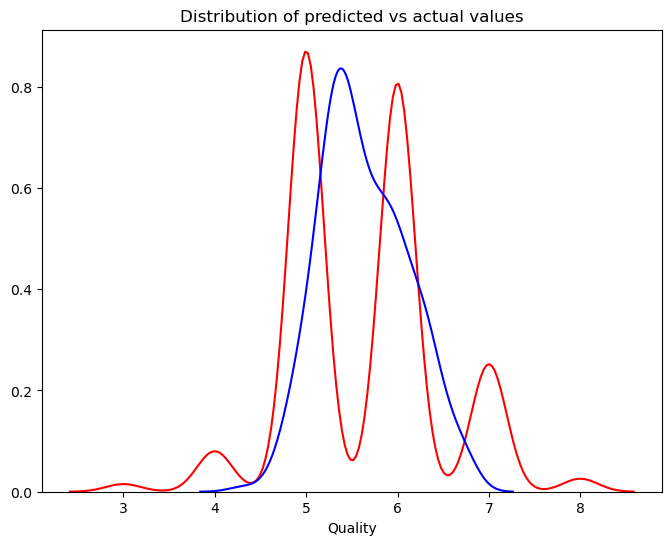

In [47]:
# Plot residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
ax1 = sns.distplot(target, hist = False, color ="r", label="Actual Values")
sns.distplot(y_pred, hist = False, color ="b", label="Predicted Values")
plt.title("Distribution of predicted vs actual values")
plt.xlabel("Quality")
plt.ylabel("")
plt.show()



In **Residuals plot**, we see that the residuals are not randomly scattered around the 0 line. Instead, there's a pattern in the residuals, with them increasing or decreasing systematically as the predicted values change. This suggests non-constant variance in the errors, indicating that the linear model might not be the best fit. 

In **Histogram Of Residuals** should ideally resemble a normal distribution (bell curve) if the assumptions of linear regression hold. In your case, the residuals appear roughly normal with a slight skew, but the distribution doesn't show severe non-normality

In **Distribution plot**, the predicted values are heavily concentrated around 5-6, while actual values have a wider spread, suggesting that the model might be under-predicting higher and lower quality wines. This indicates that your model lacks precision in predicting the full range of quality scores.